# Statistics Testing

ANOVA tests (categorical vs. numerical data):
- Job.Portal vs. Min_Salary
- Job.Portal vs. Max_Salary
- Preference vs. Min_Salary
- Preference vs. Max_Salary
- Work.Type vs. Min_Salary
- Work.Type vs. Max_Salary

Future tests (categorical vs. numerical data):
- Min_Experience vs. Min_Salary
- Min_Experience vs. Max_Salary
- Max_Experience vs. Min_Salary
- Max_Experience vs. Max_Salary

# Preliminary Data Cleaning

In [1]:
library(dplyr)
library(stringr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
df <- read.csv("sampled_job_descriptions.csv", sep=",", header=TRUE, fill=TRUE)

head(df, 5)

Experience,Qualifications,Salary.Range,Country,Work.Type,Company.Size,Job.Posting.Date,Preference,Job.Title,Role,Job.Portal,Benefits,skills,Company.Profile
4 to 11 Years,M.Com,$61K-$128K,"Macedonia, FYR",Temporary,90997,2023-02-08,Female,Landscape Designer,Sustainable Landscape Specialist,ZipRecruiter,"{'Transportation Benefits, Professional Development, Bonuses and Incentive Programs, Profit-Sharing, Employee Discounts'}",Sustainable landscape design Native plant selection Water conservation Soil health Green building practices LEED certification,"{""Sector"":""Oil & Gas"",""Industry"":""Oil and Gas"",""City"":""London"",""State"":""N/A"",""Zip"":""N/A"",""Website"":""www.bp.com"",""Ticker"":""BP"",""CEO"":""Bernard Looney""}"
3 to 10 Years,M.Tech,$65K-$129K,Greenland,Intern,123218,2023-05-10,Female,Structural Engineer,Construction Engineer,FlexJobs,"{'Health Insurance, Retirement Plans, Flexible Work Arrangements, Employee Assistance Programs (EAP), Bonuses and Incentive Programs'}",Construction management Structural design AutoCAD proficiency Project management Site inspection,"{""Sector"":""Utilities"",""Industry"":""Utilities: Gas and Electric"",""City"":""King of Prussia"",""State"":""Pennsylvania"",""Zip"":""19406"",""Website"":""www.ugicorp.com"",""Ticker"":""UGI"",""CEO"":""Roger Perreault""}"
0 to 15 Years,M.Tech,$56K-$114K,Kiribati,Full-Time,62356,2023-04-11,Male,Physical Therapist,Geriatric Physical Therapist,SimplyHired,"{'Casual Dress Code, Social and Recreational Activities, Employee Referral Programs, Health and Wellness Facilities, Life and Disability Insurance'}",Geriatric rehabilitation Fall prevention Elderly patient care,"{""Sector"":""Aerospace and Defense"",""Industry"":""Aerospace & Defense"",""City"":""Reston"",""State"":""Virginia"",""Zip"":""20190"",""Website"":""www.gd.com"",""Ticker"":""GD"",""CEO"":""Phebe N. Novakovic""}"
2 to 12 Years,PhD,$57K-$113K,Papua New Guinea,Intern,61041,2023-07-13,Both,Architect,Sustainable Design Specialist,Jobs2Careers,"{'Life and Disability Insurance, Stock Options or Equity Grants, Employee Recognition Programs, Health Insurance, Social and Recreational Activities'}",Sustainable design principles Energy efficiency LEED certification Green building materials Environmental impact assessment,"{""Sector"":""Automotive"",""Industry"":""Automotive Retailing, Services"",""City"":""Medford"",""State"":""Oregon"",""Zip"":""97501"",""Website"":""www.lithiadriveway.com"",""Ticker"":""LAD"",""CEO"":""Bryan B. Deboer""}"
2 to 9 Years,B.Com,$57K-$110K,Georgia,Temporary,84565,2023-08-10,Both,Office Manager,Office Coordinator,Idealist,"{'Childcare Assistance, Paid Time Off (PTO), Relocation Assistance, Flexible Work Arrangements, Professional Development'}",Office administration Calendar management Reception duties Communication skills Record keeping Office supplies management,"{""Sector"":""Retail"",""Industry"":""Automotive Retailing, Services"",""City"":""Richmond"",""State"":""Virginia"",""Zip"":""23238"",""Website"":""www.carmax.com"",""Ticker"":""KMX"",""CEO"":""William D. Nash""}"


In [3]:
# Function to extract numeric values
extract_numeric <- function(x) {
  # Extract numeric part and remove non-numeric characters
  numeric_part <- gsub("\\D", "", x)
  # Convert to numeric (handling empty strings)
  ifelse(numeric_part == "", NA, as.numeric(numeric_part))
}

# Split the "Salary.Range" column by "-"
df_new <- df %>%
  mutate(Salary.Range = strsplit(as.character(Salary.Range), "-")) %>%
  # Extract minimum and maximum values
  mutate(
    Min_Salary = extract_numeric(sapply(Salary.Range, `[`, 1)) * 1000,
    Max_Salary = extract_numeric(sapply(Salary.Range, `[`, 2)) * 1000
  )

# Print the modified data frame
print(head(df_new, 5))

     Experience Qualifications Salary.Range          Country Work.Type
1 4 to 11 Years          M.Com  $61K, $128K   Macedonia, FYR Temporary
2 3 to 10 Years         M.Tech  $65K, $129K        Greenland    Intern
3 0 to 15 Years         M.Tech  $56K, $114K         Kiribati Full-Time
4 2 to 12 Years            PhD  $57K, $113K Papua New Guinea    Intern
5  2 to 9 Years          B.Com  $57K, $110K          Georgia Temporary
  Company.Size Job.Posting.Date Preference           Job.Title
1        90997       2023-02-08     Female  Landscape Designer
2       123218       2023-05-10     Female Structural Engineer
3        62356       2023-04-11       Male  Physical Therapist
4        61041       2023-07-13       Both           Architect
5        84565       2023-08-10       Both      Office Manager
                              Role   Job.Portal
1 Sustainable Landscape Specialist ZipRecruiter
2            Construction Engineer     FlexJobs
3     Geriatric Physical Therapist  SimplyHired
4   

In [4]:
# Splitting the string
extracted_values <- str_match(df_new$Experience, "(\\d+) to (\\d+) Years")

# Extracting min and max experience
min_experience <- as.numeric(extracted_values[, 2])
max_experience <- as.numeric(extracted_values[, 3])

# Creating new columns for minimum and maximum experience
df_new$Min_Experience <- min_experience
df_new$Max_Experience <- max_experience

head(df_new, 5)

Experience,Qualifications,Salary.Range,Country,Work.Type,Company.Size,Job.Posting.Date,Preference,Job.Title,Role,Job.Portal,Benefits,skills,Company.Profile,Min_Salary,Max_Salary,Min_Experience,Max_Experience
4 to 11 Years,M.Com,"$61K , $128K","Macedonia, FYR",Temporary,90997,2023-02-08,Female,Landscape Designer,Sustainable Landscape Specialist,ZipRecruiter,"{'Transportation Benefits, Professional Development, Bonuses and Incentive Programs, Profit-Sharing, Employee Discounts'}",Sustainable landscape design Native plant selection Water conservation Soil health Green building practices LEED certification,"{""Sector"":""Oil & Gas"",""Industry"":""Oil and Gas"",""City"":""London"",""State"":""N/A"",""Zip"":""N/A"",""Website"":""www.bp.com"",""Ticker"":""BP"",""CEO"":""Bernard Looney""}",61000,128000,4,11
3 to 10 Years,M.Tech,"$65K , $129K",Greenland,Intern,123218,2023-05-10,Female,Structural Engineer,Construction Engineer,FlexJobs,"{'Health Insurance, Retirement Plans, Flexible Work Arrangements, Employee Assistance Programs (EAP), Bonuses and Incentive Programs'}",Construction management Structural design AutoCAD proficiency Project management Site inspection,"{""Sector"":""Utilities"",""Industry"":""Utilities: Gas and Electric"",""City"":""King of Prussia"",""State"":""Pennsylvania"",""Zip"":""19406"",""Website"":""www.ugicorp.com"",""Ticker"":""UGI"",""CEO"":""Roger Perreault""}",65000,129000,3,10
0 to 15 Years,M.Tech,"$56K , $114K",Kiribati,Full-Time,62356,2023-04-11,Male,Physical Therapist,Geriatric Physical Therapist,SimplyHired,"{'Casual Dress Code, Social and Recreational Activities, Employee Referral Programs, Health and Wellness Facilities, Life and Disability Insurance'}",Geriatric rehabilitation Fall prevention Elderly patient care,"{""Sector"":""Aerospace and Defense"",""Industry"":""Aerospace & Defense"",""City"":""Reston"",""State"":""Virginia"",""Zip"":""20190"",""Website"":""www.gd.com"",""Ticker"":""GD"",""CEO"":""Phebe N. Novakovic""}",56000,114000,0,15
2 to 12 Years,PhD,"$57K , $113K",Papua New Guinea,Intern,61041,2023-07-13,Both,Architect,Sustainable Design Specialist,Jobs2Careers,"{'Life and Disability Insurance, Stock Options or Equity Grants, Employee Recognition Programs, Health Insurance, Social and Recreational Activities'}",Sustainable design principles Energy efficiency LEED certification Green building materials Environmental impact assessment,"{""Sector"":""Automotive"",""Industry"":""Automotive Retailing, Services"",""City"":""Medford"",""State"":""Oregon"",""Zip"":""97501"",""Website"":""www.lithiadriveway.com"",""Ticker"":""LAD"",""CEO"":""Bryan B. Deboer""}",57000,113000,2,12
2 to 9 Years,B.Com,"$57K , $110K",Georgia,Temporary,84565,2023-08-10,Both,Office Manager,Office Coordinator,Idealist,"{'Childcare Assistance, Paid Time Off (PTO), Relocation Assistance, Flexible Work Arrangements, Professional Development'}",Office administration Calendar management Reception duties Communication skills Record keeping Office supplies management,"{""Sector"":""Retail"",""Industry"":""Automotive Retailing, Services"",""City"":""Richmond"",""State"":""Virginia"",""Zip"":""23238"",""Website"":""www.carmax.com"",""Ticker"":""KMX"",""CEO"":""William D. Nash""}",57000,110000,2,9


# Job Portal

In [5]:
job_portal <- as.data.frame(table(df_new$Job.Portal))
job_portal <- job_portal[order(job_portal$Freq, decreasing=TRUE), ]
job_portal

,Var1,Freq
5,Idealist,8121
13,Stack Overflow Jobs,8120
11,SimplyHired,8079
3,FlexJobs,8053
8,Jobs2Careers,8044
15,USAJOBS,7993
7,Internships.com,7961
14,The Muse,7954
12,Snagajob,7951
16,ZipRecruiter,4109


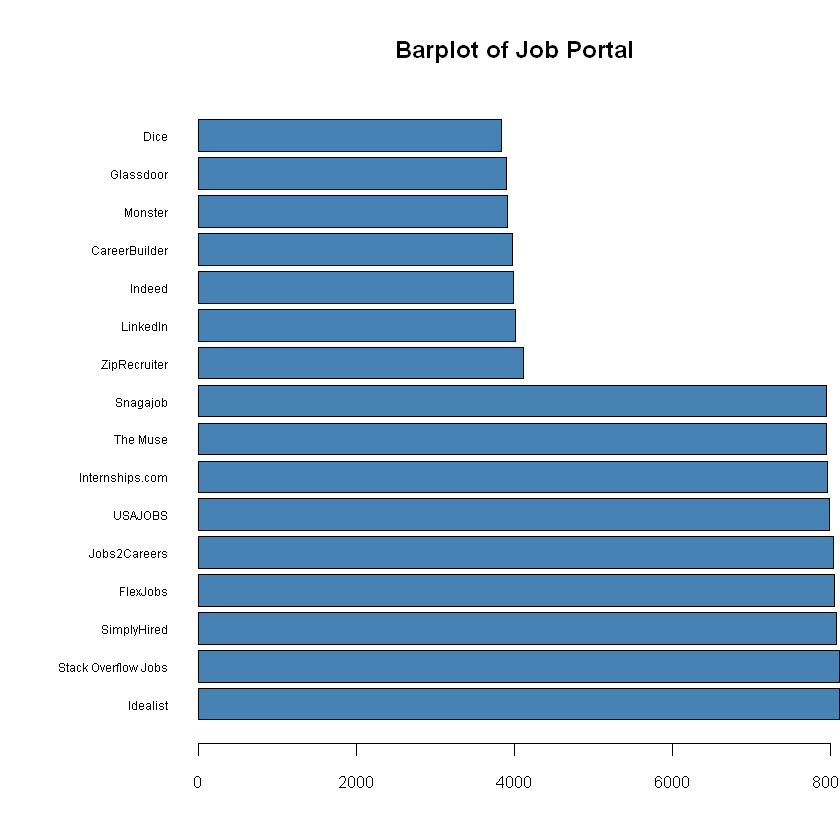

In [6]:
par(mar=c(4, 8, 4, 0)) # set bottom, left, up, and right margins
barplot(job_portal$Freq, names.arg=job_portal$Var1, main="Barplot of Job Portal", col="steelblue", 
        cex.names=0.6, cex.axis=0.8, horiz=TRUE, las=1) # make barplot and all text labels horizontal

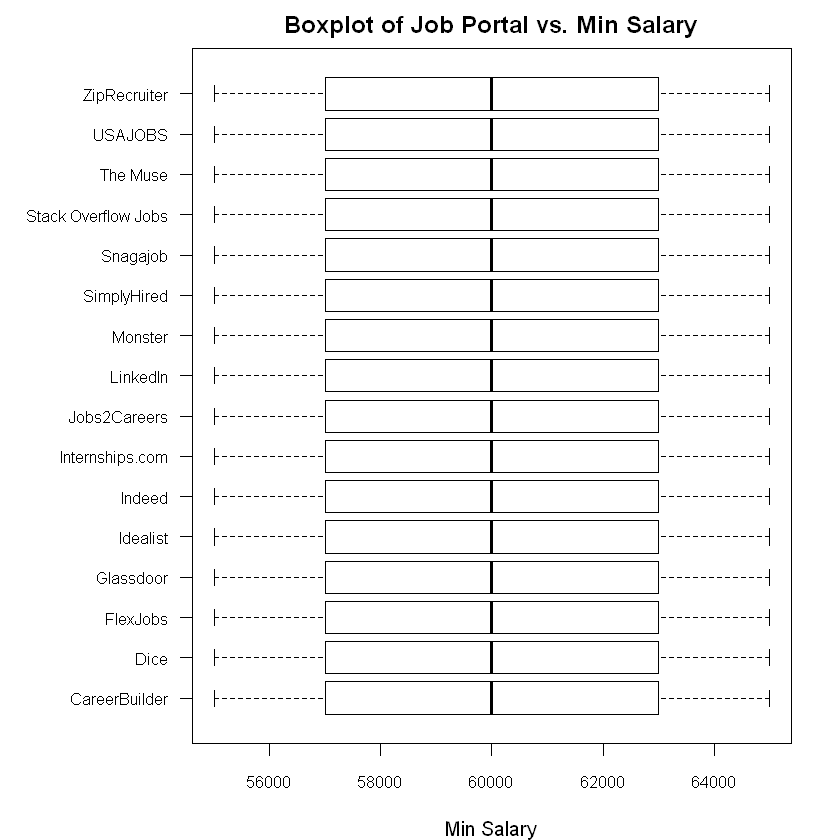

In [7]:
par(mar=c(4, 8, 2, 2))
boxplot(df_new$Min_Salary~df_new$Job.Portal, data=df_new, las=1, ylab="", xlab="Min Salary", cex.axis=0.8, horizontal=TRUE, 
       main="Boxplot of Job Portal vs. Min Salary")

### Hypothesis Testing for Job Portal vs. Min Salary (one-way ANOVA test)

H0: The job portals have the same mean MINIMUM salary <br>
H1: Not all the job portals have the same mean MINIMUM salary (at least one job portal has a different mean salary)

In [8]:
res_aov <- aov(df_new$Min_Salary ~ df_new$Job.Portal, data = df_new)

summary(res_aov)

                     Df    Sum Sq Mean Sq F value Pr(>F)
df_new$Job.Portal    15 1.136e+08 7571793   0.758  0.726
Residuals         99984 9.994e+11 9995144               

<br> With a p-value > 0.05, we do not reject H0. Therefore, the job portals have the same mean MINIMUM salary.

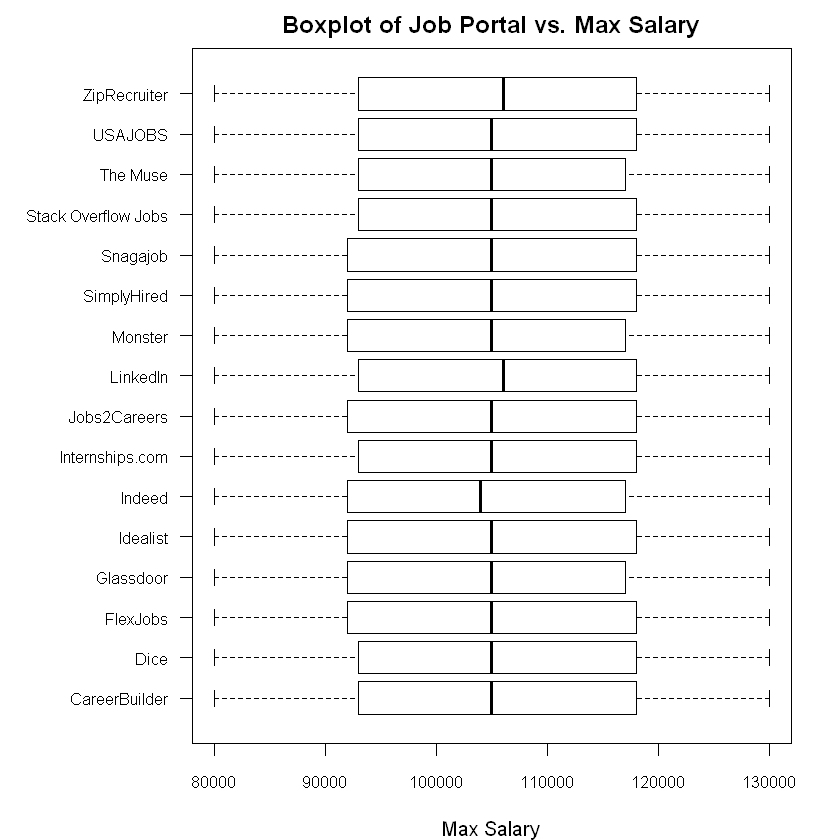

In [9]:
par(mar=c(4, 8, 2, 2))
boxplot(df_new$Max_Salary~df_new$Job.Portal, data=df_new, las=1, ylab="", xlab="Max Salary", cex.axis=0.8, horizontal=TRUE, 
       main="Boxplot of Job Portal vs. Max Salary")

### Hypothesis Testing for Job Portal vs. Max Salary (one-way ANOVA test)

H0: The job portals have the same mean MAXIMUM salary <br>
H1: Not all the job portals have the same mean MAXIMUM salary (at least one job portal has a different mean salary)

In [10]:
res_aov <- aov(df_new$Max_Salary ~ df_new$Job.Portal, data = df_new)

summary(res_aov)

                     Df    Sum Sq   Mean Sq F value Pr(>F)
df_new$Job.Portal    15 1.896e+09 126425175   0.588  0.887
Residuals         99984 2.150e+13 215050019               

<br> With a p-value > 0.05, we do not reject H0. Therefore, the job portals have the same mean MAXIMUM salary.

# Preference

In [11]:
prefer <- as.data.frame(table(df_new$Preference))
prefer <- prefer[order(prefer$Freq, decreasing=TRUE), ]
prefer

,Var1,Freq
3,Male,33423
1,Both,33290
2,Female,33287


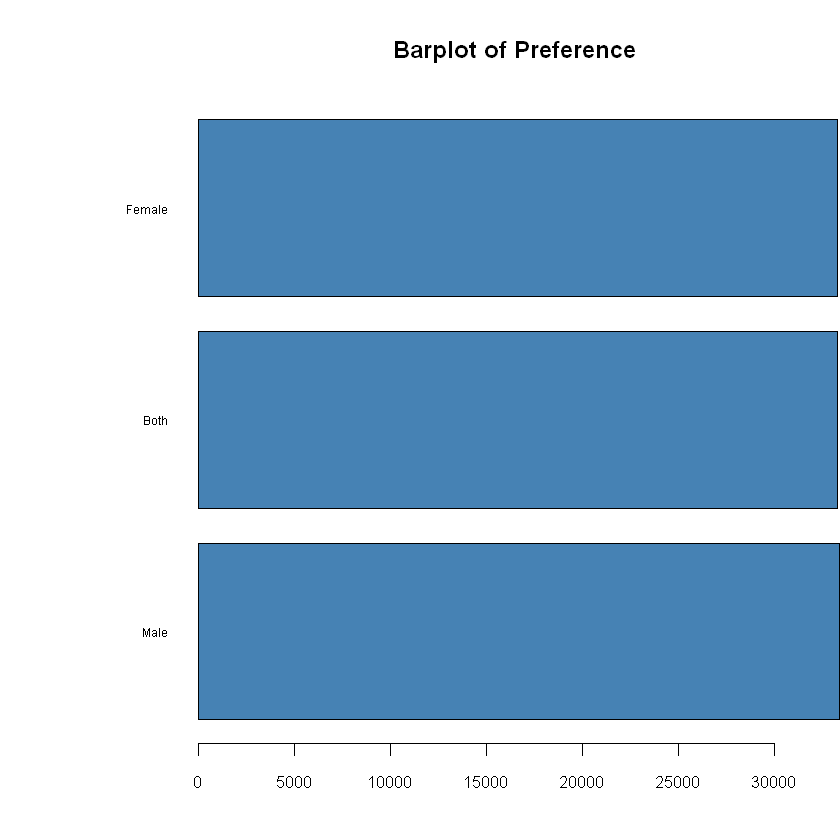

In [12]:
par(mar=c(4, 8, 4, 0)) # set bottom, left, up, and right margins
barplot(prefer$Freq, names.arg=prefer$Var1, main="Barplot of Preference", col="steelblue", 
        cex.names=0.6, cex.axis=0.8, horiz=TRUE, las=1) # make barplot and all text labels horizontal

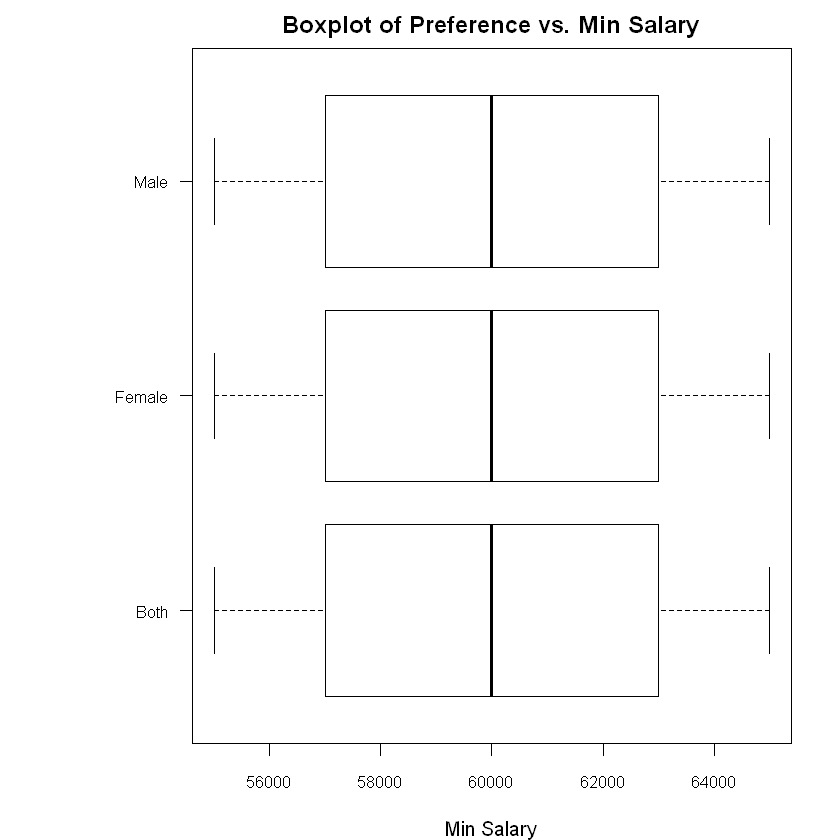

In [13]:
par(mar=c(4, 8, 2, 2))
boxplot(df_new$Min_Salary~df_new$Preference, data=df_new, las=1, ylab="", xlab="Min Salary", cex.axis=0.8, horizontal=TRUE, 
       main="Boxplot of Preference vs. Min Salary")

### Hypothesis Testing for Preference vs. Min Salary (one-way ANOVA test)

H0: The companies with different preferences have the same mean MINIMUM salary <br>
H1: Not all types of preferences have the same mean MINIMUM salary (at least one type of preference has a different mean salary)

In [14]:
res_aov <- aov(df_new$Min_Salary ~ df_new$Preference, data = df_new)

summary(res_aov)

                     Df    Sum Sq  Mean Sq F value Pr(>F)
df_new$Preference     2 3.612e+07 18057649   1.807  0.164
Residuals         99997 9.994e+11  9994619               

<br> With a p-value > 0.05, we do not reject H0. Therefore, the types of preferences have the same mean MINIMUM salary.

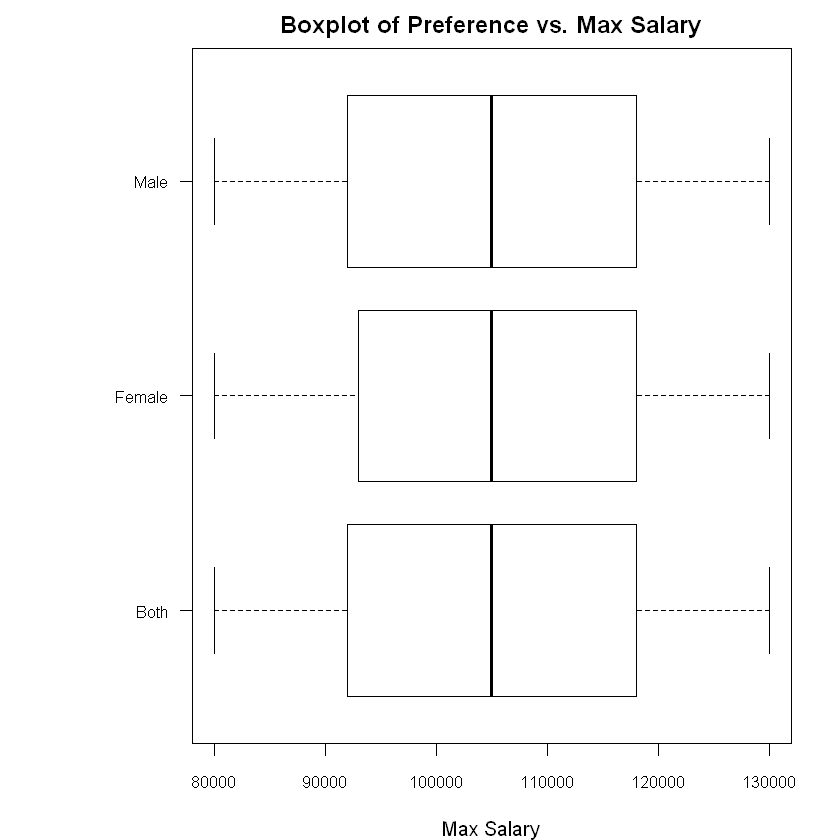

In [15]:
par(mar=c(4, 8, 2, 2))
boxplot(df_new$Max_Salary~df_new$Preference, data=df_new, las=1, ylab="", xlab="Max Salary", cex.axis=0.8, horizontal=TRUE, 
       main="Boxplot of Preference vs. Max Salary")

### Hypothesis Testing for Preference vs. Max Salary (one-way ANOVA test)

H0: The companies with different preferences have the same mean MAXIMUM salary <br>
H1: Not all types of preferences have the same mean MAXIMUM salary (at least one type of preference has a different mean salary)

In [16]:
res_aov <- aov(df_new$Max_Salary ~ df_new$Preference, data = df_new)

summary(res_aov)

                     Df    Sum Sq   Mean Sq F value Pr(>F)
df_new$Preference     2 5.726e+08 286280664   1.331  0.264
Residuals         99997 2.150e+13 215035301               

<br> With a p-value > 0.05, we do not reject H0. Therefore, the types of preferences have the same mean MAXIMUM salary.

# Work Type

In [17]:
work_type <- as.data.frame(table(df_new$Work.Type))
work_type <- work_type[order(work_type$Freq, decreasing=TRUE), ]
work_type

,Var1,Freq
2,Full-Time,20204
4,Part-Time,20041
5,Temporary,19958
1,Contract,19923
3,Intern,19874


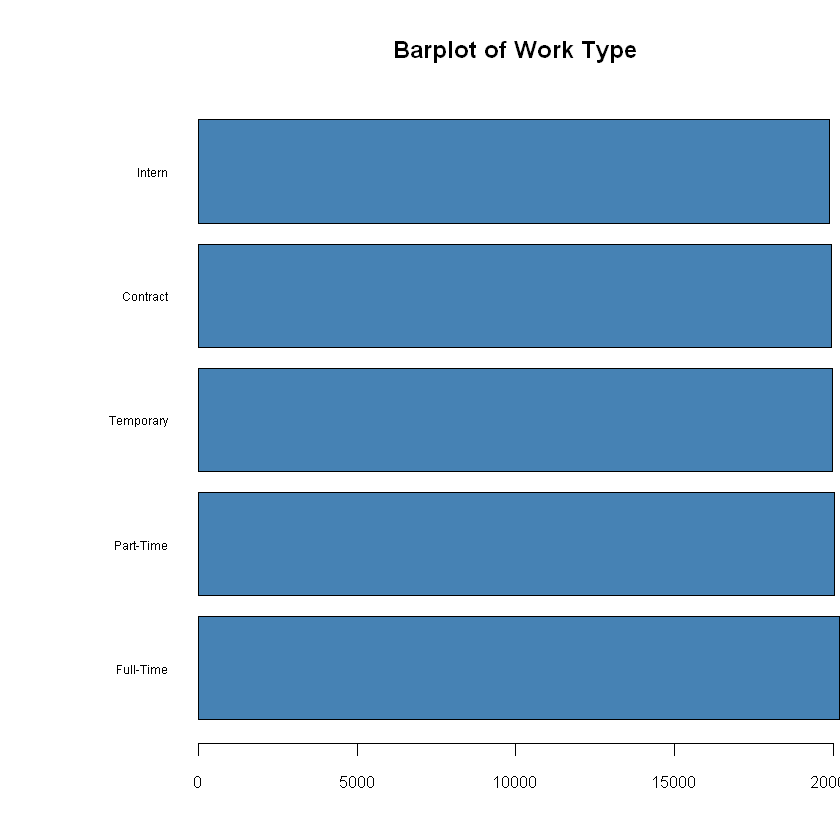

In [18]:
par(mar=c(4, 8, 4, 0)) # set bottom, left, up, and right margins
barplot(work_type$Freq, names.arg=work_type$Var1, main="Barplot of Work Type", col="steelblue", 
        cex.names=0.6, cex.axis=0.8, horiz=TRUE, las=1) # make barplot and all text labels horizontal

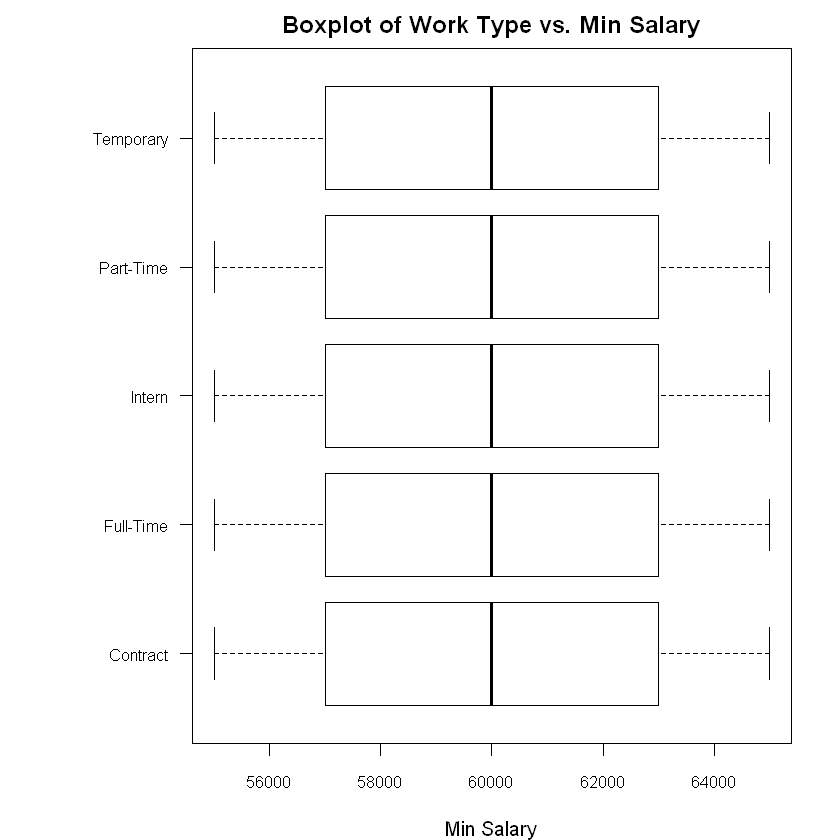

In [19]:
par(mar=c(4, 8, 2, 2))
boxplot(df_new$Min_Salary~df_new$Work.Type, data=df_new, las=1, ylab="", xlab="Min Salary", cex.axis=0.8, horizontal=TRUE, 
       main="Boxplot of Work Type vs. Min Salary")

### Hypothesis Testing for Work Type vs. Min Salary (one-way ANOVA test)

H0: The different work types have the same mean MINIMUM salary <br>
H1: Not all work types have the same mean MINIMUM salary (at least one work type has a different mean salary)

In [20]:
res_aov <- aov(df_new$Min_Salary ~ df_new$Work.Type, data = df_new)

summary(res_aov)

                    Df    Sum Sq  Mean Sq F value Pr(>F)
df_new$Work.Type     4 4.808e+07 12019718   1.203  0.307
Residuals        99995 9.994e+11  9994700               

<br> With a p-value > 0.05, we do not reject H0. Therefore, the work types have the same mean MINIMUM salary.

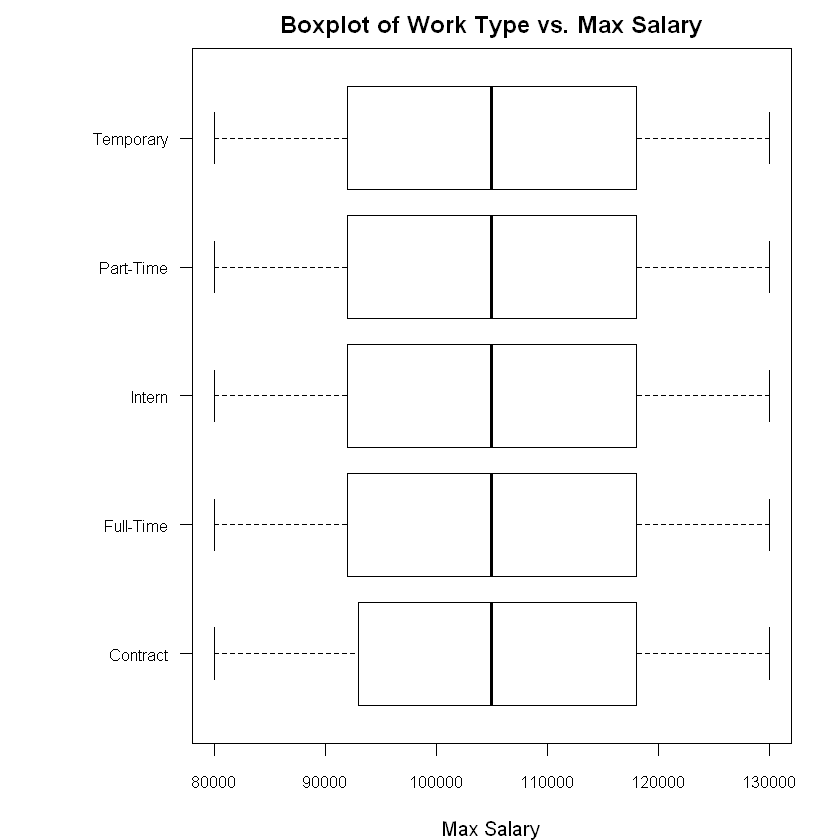

In [21]:
par(mar=c(4, 8, 2, 2))
boxplot(df_new$Max_Salary~df_new$Work.Type, data=df_new, las=1, ylab="", xlab="Max Salary", cex.axis=0.8, horizontal=TRUE, 
       main="Boxplot of Work Type vs. Max Salary")

### Hypothesis Testing for Work Type vs. Max Salary (one-way ANOVA test)

H0: The different work types have the same mean MAXIMUM salary <br>
H1: Not all work types have the same mean MAXIMUM salary (at least one work type has a different mean salary)

In [22]:
res_aov <- aov(df_new$Max_Salary ~ df_new$Work.Type, data = df_new)

summary(res_aov)

                    Df    Sum Sq   Mean Sq F value Pr(>F)
df_new$Work.Type     4 4.335e+08 108371368   0.504  0.733
Residuals        99995 2.150e+13 215040992               

<br> With a p-value > 0.05, we do not reject H0. Therefore, the work types have the same mean MAXIMUM salary.